In [109]:
import pandas as pd 

df = pd.read_csv('G:/Mi unidad/VSC/DSA_DATACAMP/proyectos/credit_card_fraude/data/raw/fraud.csv')
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

# Validación de cc de tarjetas de créditos en estados unidos, identificando qué tipo de tarjeta es 


In [111]:
def card_type(cc_num):
    if (len(cc_num) == 16 or len (cc_num) == 13 or len (cc_num) == 19) and cc_num.startswith('4'):
        return 'Visa'
    elif len(cc_num) == 16 and (cc_num.startswith('5155') or cc_num.startswith('2221') or cc_num.startswith('2720')):
        return 'MasterCard'
    elif len(cc_num) == 15 and (cc_num.startswith('34') or cc_num.startswith('37')):
        return 'American Express'
    elif len(cc_num) == 16 and (cc_num.startswith('6011') or cc_num.startswith('622') or cc_num.startswith('64') or cc_num.startswith('65')):
        return 'Discover'
    elif (len(cc_num) == 16 or len(cc_num) == 14) and (cc_num.startswith('300') or cc_num.startswith('305') or cc_num.startswith('36') or cc_num.startswith('38') or cc_num.startswith('39')):
        return 'Dinner Club'
    else :
        return 'Unknown'

In [112]:
# Aplicamos la función a la columna 'cc_num' y creamos una nueva columna 'card_type'
df['card_type'] = df['cc_num'].astype('str').apply(card_type)
df['card_type'].value_counts()

card_type
Unknown             827809
Visa                598643
American Express    177089
Discover            150084
Dinner Club          88544
MasterCard           10225
Name: count, dtype: int64

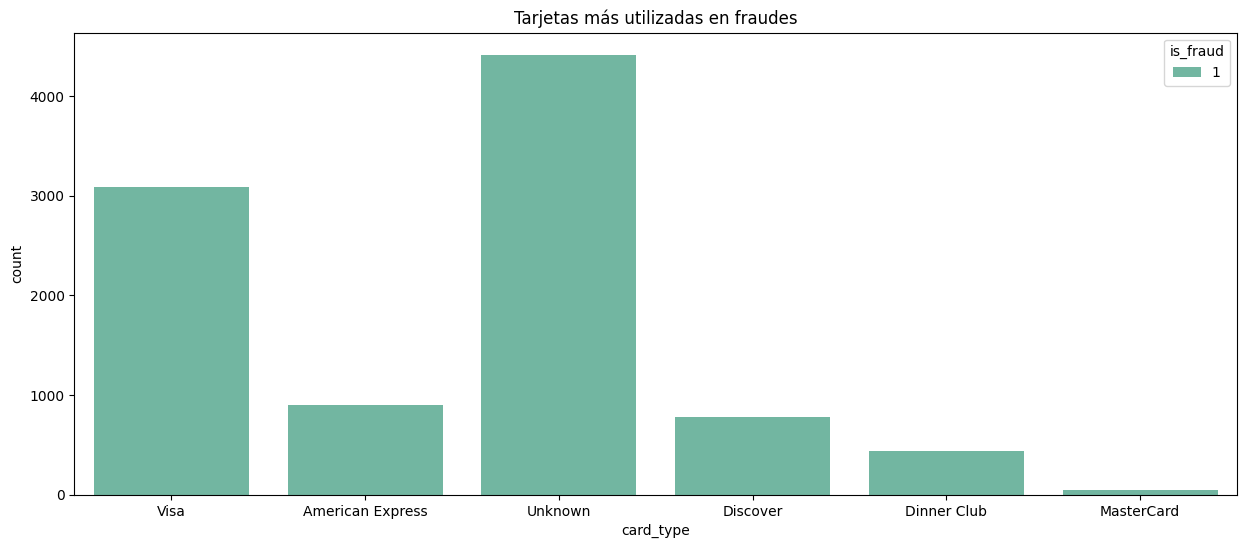

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(data=df[df['is_fraud'] == 1], x='card_type', hue='is_fraud', palette='Set2')
plt.title('Tarjetas más utilizadas en fraudes')
plt.show()

# Distancia de la ubicación donde fue realizada la compra al negocio

In [114]:
# Calcular la distancia entre las coordenadas del negocio y del cliente

from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))

    # Distancia
    distance = R * c
    return distance

In [115]:
df['distancia_cliente_negocio'] = df.loc[:,['lat', 'long', 'merch_lat', 'merch_long']].apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)
df['distancia_cliente_negocio'] 

0           78.597568
1           30.212176
2          108.206083
3           95.673231
4           77.556744
              ...    
1852389     77.026148
1852390    100.074420
1852391     80.759302
1852392     52.933240
1852393     72.438289
Name: distancia_cliente_negocio, Length: 1852394, dtype: float64

<Figure size 1500x600 with 0 Axes>

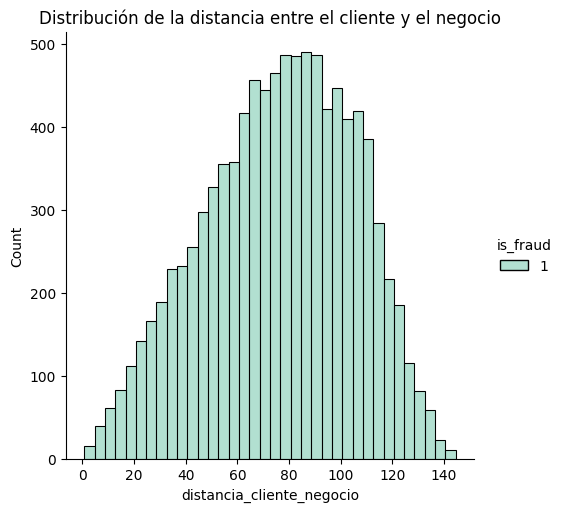

In [116]:
plt.figure(figsize=(15, 6))
sns.displot(data=df[df['is_fraud'] == 1], x='distancia_cliente_negocio', hue='is_fraud', palette='Set2')
plt.title('Distribución de la distancia entre el cliente y el negocio')
plt.show()


# Edad de los clientes

In [117]:
# Fecha de nacimiento
df['dob'] 

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [118]:
# Vamos a crear una variable edad, calculando en base la fecha de la transacción y la fecha de nacimiento.

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
# Conversión con fecha y hora
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')


delta = df['trans_date_trans_time'] - df['dob']

df['edad'] = delta.dt.days // 365 # Dividimos entre 365 para obtener la edad en años
df['edad']

0          30
1          40
2          56
3          52
4          32
           ..
1852389    54
1852390    21
1852391    39
1852392    55
1852393    27
Name: edad, Length: 1852394, dtype: int64

C:\Users\leo_2\AppData\Local\Temp\ipykernel_8884\3525690635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['edad'], bins=30, kde=True, color='blue')


<Axes: xlabel='edad', ylabel='Density'>

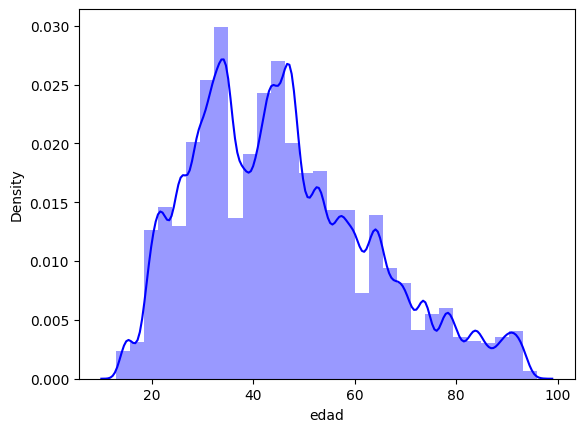

In [119]:
sns.distplot(df['edad'], bins=30, kde=True, color='blue')

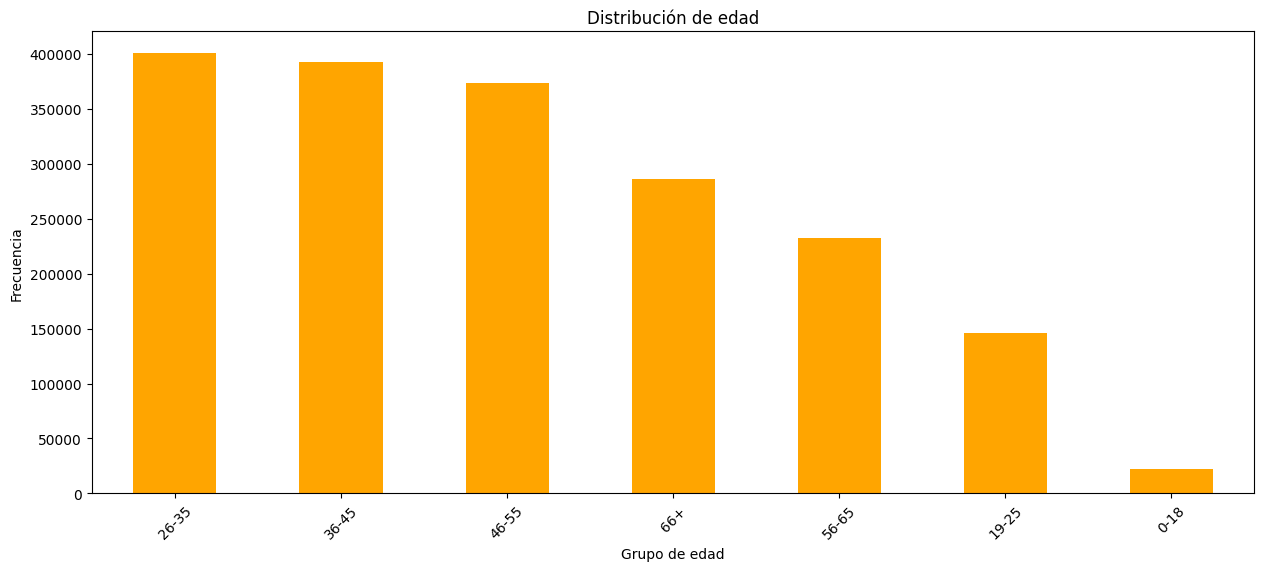

In [120]:
# Crearemos grupos de edades 

plt.figure(figsize=(15, 6))

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False) 
df['grupo_edad'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribución de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


# Tipos de vías de los clientes

In [121]:
# tipos_via = ['Avenue', 'Street', 'Boulevard', 'Drive', 'Road', 'Lane', 'Court', 'Place', 'Parkway', 'Circle', 'Trail', 'Way', 'Terrace', 'Loop', 'Creek', 'Brook', 'Manor', 'Ridge', 'View']

# import re
# def extraer_tipo_via(direccion):
#     for tipo in tipos_via:
#         if re.search(rf'\b{tipo}\b', direccion, re.IGNORECASE):
#             return tipo
#     return 'Otro'

# df['tipo_via'] = df['street'].apply(extraer_tipo_via)


In [122]:
# df.pivot_table(index='tipo_via', columns='is_fraud', values='amt', aggfunc='mean', fill_value=0)

In [123]:
# No basta con etiquetar por tipo de vía, sino vamos a guiarnos del promedio del monto de transacción que se realiza en cada tipo de vía. 

# filtro = 100


df.loc[(df['is_fraud'] == 1) & (df['amt'] >= 100.0),'street'] = 'Via_Montos_Altos'
df.loc[(df['is_fraud'] == 1) & (df['amt'] < 100.0),'street'] = 'Via_Montos_Bajos'



In [124]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'card_type', 'distancia_cliente_negocio',
       'edad', 'grupo_edad'],
      dtype='object')

# Validación de ciudades y su estado (NO PUDE AVERIGUAR QUE CIUDAD PERTENECE A CADA ESTADO :())

In [125]:
us_states_es = {
    'NC': 'Carolina del Norte', 'WA': 'Washington', 'ID': 'Idaho', 'MT': 'Montana',
    'VA': 'Virginia', 'PA': 'Pensilvania', 'KS': 'Kansas', 'TN': 'Tennessee',
    'IA': 'Iowa', 'WV': 'Virginia Occidental', 'FL': 'Florida', 'CA': 'California',
    'NM': 'Nuevo México', 'NJ': 'Nueva Jersey', 'OK': 'Oklahoma', 'IN': 'Indiana',
    'MA': 'Massachusetts', 'TX': 'Texas', 'WI': 'Wisconsin', 'MI': 'Míchigan',
    'WY': 'Wyoming', 'HI': 'Hawái', 'NE': 'Nebraska', 'OR': 'Oregón',
    'LA': 'Luisiana', 'DC': 'Distrito de Columbia', 'KY': 'Kentucky',
    'NY': 'Nueva York', 'MS': 'Misisipi', 'UT': 'Utah', 'AL': 'Alabama',
    'AR': 'Arkansas', 'MD': 'Maryland', 'GA': 'Georgia', 'ME': 'Maine',
    'AZ': 'Arizona', 'MN': 'Minnesota', 'OH': 'Ohio', 'CO': 'Colorado',
    'VT': 'Vermont', 'MO': 'Misuri', 'SC': 'Carolina del Sur', 'NV': 'Nevada',
    'IL': 'Illinois', 'NH': 'Nuevo Hampshire', 'SD': 'Dakota del Sur', 'AK': 'Alaska',
    'ND': 'Dakota del Norte', 'CT': 'Connecticut', 'RI': 'Rhode Island',
    'DE': 'Delaware'
}



In [126]:
# for i in us_states_es.keys():
#     df.loc[df['state'] == i, 'state'] = us_states_es[i]
# df['state']

df['state'] = df['state'].replace(us_states_es)


In [127]:
ciudades_por_estado = {
    "Carolina del Norte": ["Charlotte", "Raleigh", "Greensboro", "Durham", "Winston-Salem"],
    "Washington": ["Seattle", "Spokane", "Tacoma", "Vancouver", "Bellevue"],
    "Idaho": ["Boise", "Meridian", "Nampa", "Idaho Falls", "Pocatello"],
    "Montana": ["Billings", "Missoula", "Great Falls", "Bozeman", "Butte"],
    "Virginia": ["Virginia Beach", "Norfolk", "Chesapeake", "Richmond", "Newport News"],
    "Pensilvania": ["Philadelphia", "Pittsburgh", "Allentown", "Erie", "Reading"],
    "Kansas": ["Wichita", "Overland Park", "Kansas City", "Topeka", "Olathe"],
    "Tennessee": ["Memphis", "Nashville", "Knoxville", "Chattanooga", "Clarksville"],
    "Iowa": ["Des Moines", "Cedar Rapids", "Davenport", "Sioux City", "Iowa City"],
    "Virginia Occidental": ["Charleston", "Huntington", "Morgantown", "Parkersburg", "Wheeling"],
    "Florida": ["Jacksonville", "Miami", "Tampa", "Orlando", "St. Petersburg"],
    "California": ["Los Ángeles", "San Diego", "San José", "San Francisco", "Fresno"],
    "Nuevo México": ["Albuquerque", "Las Cruces", "Rio Rancho", "Santa Fe", "Roswell"],
    "Nueva Jersey": ["Newark", "Jersey City", "Paterson", "Elizabeth", "Edison"],
    "Oklahoma": ["Oklahoma City", "Tulsa", "Norman", "Broken Arrow", "Lawton"],
    "Indiana": ["Indianápolis", "Fort Wayne", "Evansville", "South Bend", "Carmel"],
    "Massachusetts": ["Boston", "Worcester", "Springfield", "Lowell", "Cambridge"],
    "Texas": ["Houston", "San Antonio", "Dallas", "Austin", "Fort Worth"],
    "Wisconsin": ["Milwaukee", "Madison", "Green Bay", "Kenosha", "Racine"],
    "Míchigan": ["Detroit", "Grand Rapids", "Warren", "Sterling Heights", "Ann Arbor"],
    "Wyoming": ["Cheyenne", "Casper", "Laramie", "Gillette", "Rock Springs"],
    "Hawái": ["Honolulu", "Hilo", "Kailua", "Kapolei", "Kaneohe"],
    "Nebraska": ["Omaha", "Lincoln", "Bellevue", "Grand Island", "Kearney"],
    "Oregón": ["Portland", "Eugene", "Salem", "Gresham", "Hillsboro"],
    "Luisiana": ["Nueva Orleans", "Baton Rouge", "Shreveport", "Lafayette", "Lake Charles"],
    "Distrito de Columbia": ["Washington D.C."],
    "Kentucky": ["Louisville", "Lexington", "Bowling Green", "Owensboro", "Covington"],
    "Nueva York": ["Nueva York", "Buffalo", "Rochester", "Yonkers", "Syracuse"],
    "Misisipi": ["Jackson", "Gulfport", "Southaven", "Hattiesburg", "Biloxi"],
    "Utah": ["Salt Lake City", "West Valley City", "Provo", "West Jordan", "Orem"],
    "Alabama": ["Birmingham", "Montgomery", "Mobile", "Huntsville", "Tuscaloosa"],
    "Arkansas": ["Little Rock", "Fort Smith", "Fayetteville", "Springdale", "Jonesboro"],
    "Maryland": ["Baltimore", "Frederick", "Rockville", "Gaithersburg", "Bowie"],
    "Georgia": ["Atlanta", "Augusta", "Columbus", "Macon", "Savannah"],
    "Maine": ["Portland", "Lewiston", "Bangor", "South Portland", "Auburn"],
    "Arizona": ["Phoenix", "Tucson", "Mesa", "Chandler", "Glendale"],
    "Minnesota": ["Minneapolis", "St. Paul", "Rochester", "Duluth", "Bloomington"],
    "Ohio": ["Columbus", "Cleveland", "Cincinnati", "Toledo", "Akron"],
    "Colorado": ["Denver", "Colorado Springs", "Aurora", "Fort Collins", "Lakewood"],
    "Vermont": ["Burlington", "South Burlington", "Rutland", "Barre", "Montpelier"],
    "Misuri": ["Kansas City", "St. Louis", "Springfield", "Columbia", "Independence"],
    "Carolina del Sur": ["Columbia", "Charleston", "North Charleston", "Mount Pleasant", "Rock Hill"],
    "Nevada": ["Las Vegas", "Henderson", "Reno", "North Las Vegas", "Sparks"],
    "Illinois": ["Chicago", "Aurora", "Naperville", "Joliet", "Rockford"],
    "Nuevo Hampshire": ["Manchester", "Nashua", "Concord", "Dover", "Rochester"],
    "Dakota del Sur": ["Sioux Falls", "Rapid City", "Aberdeen", "Brookings", "Watertown"],
    "Alaska": ["Anchorage", "Fairbanks", "Juneau", "Sitka", "Ketchikan"],
    "Dakota del Norte": ["Fargo", "Bismarck", "Grand Forks", "Minot", "West Fargo"],
    "Connecticut": ["Bridgeport", "New Haven", "Stamford", "Hartford", "Waterbury"],
    "Rhode Island": ["Providence", "Warwick", "Cranston", "Pawtucket", "East Providence"],
    "Delaware": ["Wilmington", "Dover", "Newark", "Middletown", "Smyrna"]
}